<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/nisar/Oil_Spill_NISAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NISAR Application: Oil Slicks

### Corresponding Story Map: https://arcg.is/1nXzX10

### I. How to create SAR images of oil spills?

* Useful Products: HH and VV in dB, HH/VV backscatter ratio
* Useful Wavelengths: HH, VV
* Instructions to View: Convert to decibels (dB)

### II. How to interpret SAR images of oil spills?
SAR can be used to help discriminate oil from the water surface. Questions of interest after an oil spill include: where is the oil? How much oil is there? What is the oil's trajectory?

When oil is present, it can smooth out the ocean's capillary waves and reduce the radar backscatter relative to the surrounding ocean. As a result, oil appears darker to the radar as less signal is reflected back to the sensor. This allows the radar to detect differences between thick oil and the ocean surface.

The capabilities presented here are focused on L-band radars such as NISAR and UAVSAR. NISAR is a satellite radar instrument collecting data in the L-band wavelength, and UAVSAR is an airborne radar and NISAR testbed instrument.

## SAR Examples: Gulf Coast Deep Horizon Oil Spill & North Sea Oil Slick

The Deep Horizon Oil Spill released 4 million barrels of oil into the Gulf of Mexico between April 20, 2010 and July 15, 2010. The Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR) L-band polarimetric SAR was deployed to the Gulf of Mexico from June 22–23, 2010, to collect data for scientific studies of the main oil slick and the extent and impact of oil on coastal marshlands. UAVSAR is a NISAR testbed instrument.

The North Sea Oil Spill is from Norway's NOFO's, the Norwegian Clean Seas Association for Operating Companies, oil spill cleanup simulations in the North Sea. In 2015, the exercise occured June 8th through June 11th, and UAVSAR flew over the oil-slicked area to detect the presence and depth of oil.

---------------------------------------------------------------------------

**Example 1**: [Deep Horizon Oil Spill: Plot HH Polarization in decibels (dB)](#s2)

**Example 2** : [North Sea Oil Slick: Plot HH Polarization in decibels (dB)](#s3)

**Example 3**: [North Sea Oil Slick: Oil slick movement over time](#s4)

<a name="s1"></a>
# 0. Running the Notebook
- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.

### Python Packages:  
This routine uses several python libaries. Some are already included in the Google Colab environment and others are installed and imported in the cell below. Downloading new python packages to this environment may take a few seconds to complete.


In [ ]:
!pip install rasterio --quiet

import rasterio as rio          # Read and write geospatial raster data
import math                     # Access to mathematical functions
import numpy as np              # Numeric and mathematic functions
import matplotlib.pyplot as plt # Plotting, making graphs

from skimage.measure import profile_line  # Retrieve profile along a line
from matplotlib.patches import Patch

### Download the Data

Download UAVSAR geotiffs from an external page with wget. The original UAVSAR data have been converted to geotiff and cropped to a smaller area of interest.


In [ ]:
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_32010_2010_HH_clipped.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_000_HH.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_000_HV.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_008_HH.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/norway_2015_014_HH.tif --quiet

## NISAR Simulated
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_32010_100623_HHHH_NISAR_138A_filtered_5_5.tif --quiet
!wget https://uavsar.jpl.nasa.gov/SAR_NOTEBOOKS/Oil_Spill/gulfco_32010_100623_HHHH_NISAR_129A_filtered_5_5.tif --quiet

<a name="s2"></a>
# 1. Deep Horizon Oil Spill: Plot HH Polarization in decibels (dB)

In SAR images, oil slicks appear as darker areas compared to the surrounding water surface. The oil suppresses the ocean's capillary waves or dampens the ocean's surface roughness. Smoother surfaces return less signal to the satellite, and as a result, oil slicks have lower radar backscatter relative to the surrounding ocean.

UAVSAR collected the L-band SAR data over the Gulf Coast Oil Slick in the figure below. The figure shows two overlapping data lines covering the large oil slick further south and some thinner slicks areas further north. The slicks are the darker areas in the grayscale image.

Notice the white area in the overlapping region of the data lines. This variation in backscatter intenstiy across the data line is caused by the varying incidence angles across the SAR image. When the radar reflects at a steeper angle (or higher incidence angle), the backscattering intensity tends to be weaker, appearing relatively darked in the SAR image. Conversely, areas imaged at lower incidence angles will have stronger backscatter or appear brighter in the image.

This example uses the HH polarization since NISAR will collect HH and HV over land and coastal waters.

To explore this data, first read in UAVSAR geotiffs and convert to decibels (dB).

dB units can make SAR data more manageable and interpretable when analyzing areas with wider ranges of values. The dB scale helps show variations in backscatter intensity, which is valuable to detect subtle differences such as those caused by oil slicks.

In [ ]:
def read_file(path):
    with rio.open(path) as ds:
        band = ds.read(1)
    return band

def convert_db_v1(data):
    db = 10*(math.log10(data))
    return db

convert_db = np.vectorize(convert_db_v1)

## gulfco_32010 subset
gulfco_32010_HH_l = read_file('gulfco_32010_2010_HH_clipped.tif')

## Convert to decibels
gulfco_32010_HH_l_db = convert_db(gulfco_32010_HH_l)

Next, plot a subset of UAVSAR data over the oil spill with the HH polarization. The plots below visualize a subset of the main oil slick within the Deep Horizon oil spill. The left plot shows the subset using a grayscale colormap, commonly used for visualizing SAR oil slick data. The right plot colorscale helps separate out different ranges of values.

The influence of incidence angle are evident in this data subset. Notice the darker to lighter gradient across the SAR image swath.

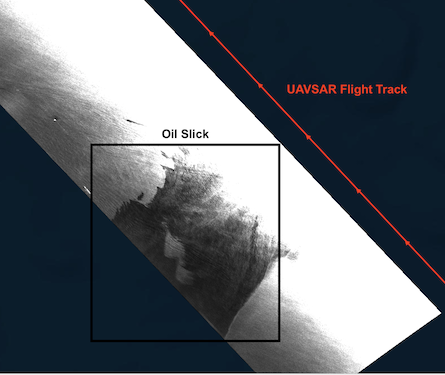

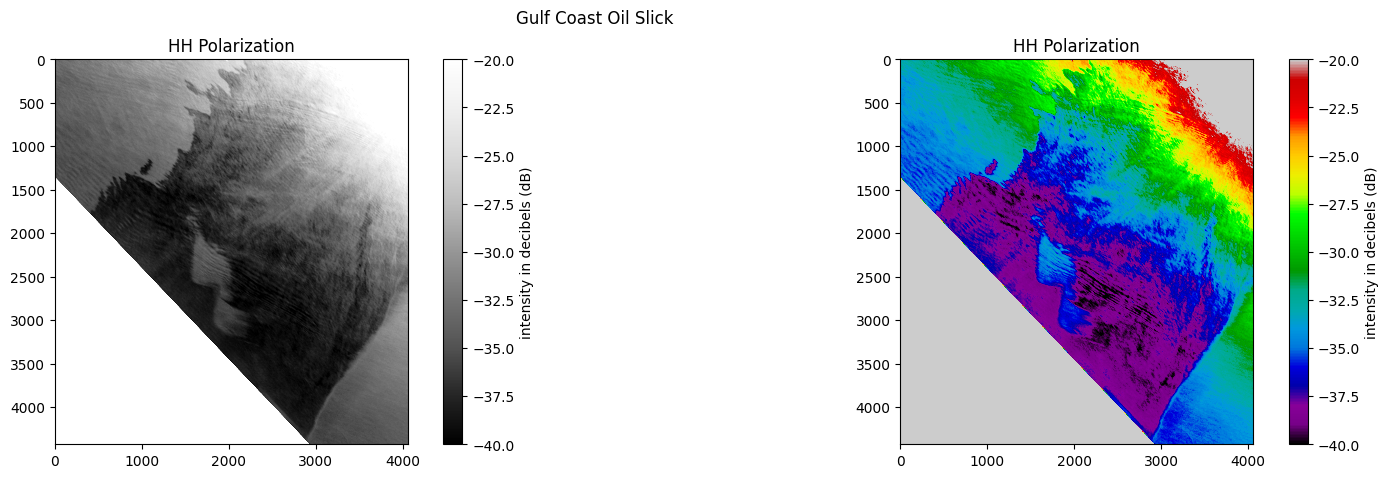

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Add general map title
fig.suptitle("Gulf Coast Oil Slick")

HV_norway = ax[0].imshow(gulfco_32010_HH_l_db, vmin=-40, vmax=-20, cmap="Greys_r")
ax[0].set_title('HH Polarization')
cbar = fig.colorbar(HV_norway, ax=ax[0])
cbar.set_label('intensity in decibels (dB)')

HH_norway = ax[1].imshow(gulfco_32010_HH_l_db, vmin=-40, vmax=-20, cmap="nipy_spectral")
ax[1].set_title('HH Polarization')
cbar = fig.colorbar(HH_norway, ax=ax[1])
cbar.set_label('intensity in decibels (dB)')

The plot below displays NISAR simulated HH data for the same oil slick coverage. NISAR simulated products are generated from UAVSAR data to emulate NISAR data characteristics in order to help users test their algorithms and get a sense of the quality of future NISAR products.

* To learn more about NISAR simulated data characteristics go here: https://uavsar.jpl.nasa.gov/science/documents/nisar-sample-products.html and browse the other available NISAR simulated data by selecting "Simulated NISAR" on the UAVSAR data search page: https://uavsar.jpl.nasa.gov/cgi-bin/data.pl.


* To learn more about all the planned NISAR data products, a short description, a link to where you can download them, go here: https://nisar.jpl.nasa.gov/data/sample-data/

The modes below are dithered with gaps 129A (20 MHz) and 138A (40 MHz)

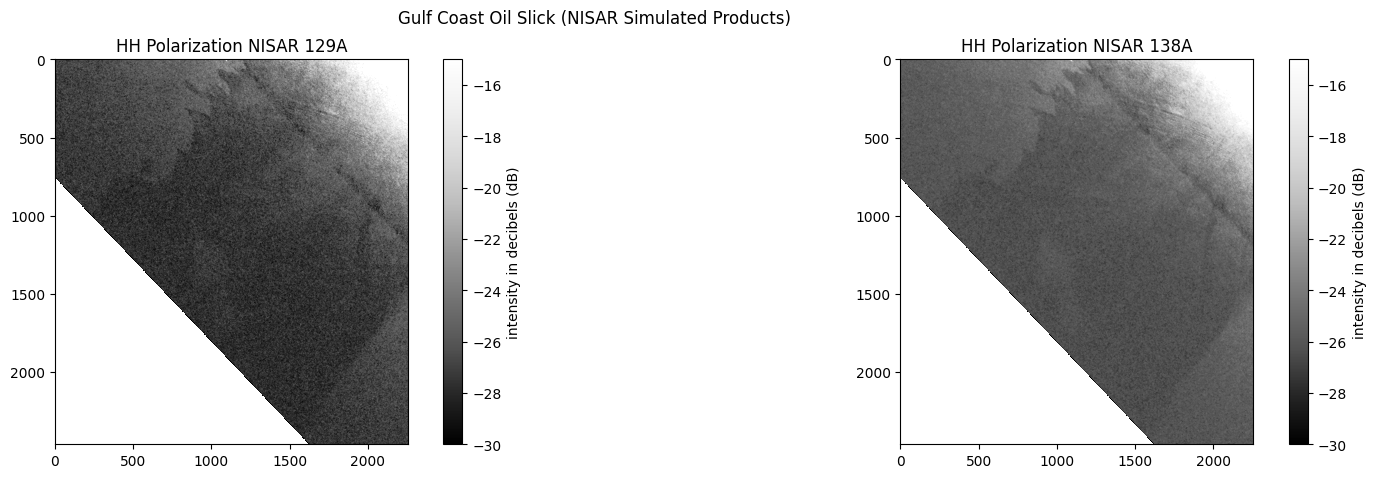

In [ ]:
#@title Plot NISAR Simulated Images

## gulfco_32010 subset
gulfco_32010_NISAR_129A = read_file('gulfco_32010_100623_HHHH_NISAR_129A_filtered_5_5.tif')
gulfco_32010_NISAR_138A = read_file('gulfco_32010_100623_HHHH_NISAR_138A_filtered_5_5.tif')

gulfco_32010_NISAR_129A[gulfco_32010_NISAR_129A == 0] = np.nan
gulfco_32010_NISAR_138A[gulfco_32010_NISAR_138A == 0] = np.nan

## Convert to decibels
gulfco_32010_NISAR_129A_db = convert_db(gulfco_32010_NISAR_129A)
gulfco_32010_NISAR_138A_db = convert_db(gulfco_32010_NISAR_138A)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Add general map title
fig.suptitle("Gulf Coast Oil Slick (NISAR Simulated Products)")

HV_norway = ax[0].imshow(gulfco_32010_NISAR_129A_db, vmin=-30, vmax=-15, cmap="Greys_r")
ax[0].set_title('HH Polarization NISAR 129A')
cbar = fig.colorbar(HV_norway, ax=ax[0])
cbar.set_label('intensity in decibels (dB)')

HH_norway = ax[1].imshow(gulfco_32010_NISAR_138A_db, vmin=-30, vmax=-15, cmap="Greys_r")
ax[1].set_title('HH Polarization NISAR 138A')
cbar = fig.colorbar(HH_norway, ax=ax[1])
cbar.set_label('intensity in decibels (dB)')

The next plots show the same data subset over the main oil slick. The graph shows 3 transects moving from the far edge towards the near edge of the SAR image. The first transect (blue) covers open water and the second and third transects (orange and red, respectively) cross the oil slick.

In the transect plot, notice how the oil slick transects have lower values than the water transect. Also notice each transect's values decrease as the transect moves from the brighter near range (lower incidence angles) to the relatively darker far range (higher incidence angles).

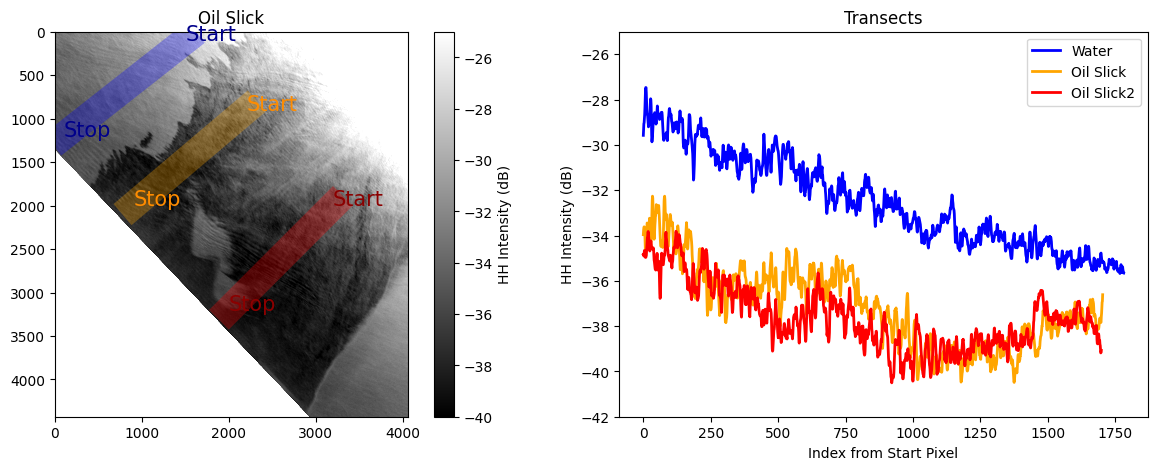

In [ ]:
#@title Plot Water and Oil Slick Transects

# Specify start/stop of the pixel coordinates for plot transect
x0, y0 = 1500, 100
x1, y1 = 100, 1200
# Generate the transect
transect_water = profile_line(gulfco_32010_HH_l_db, (y0, x0), (y1, x1), linewidth=20, mode='nearest', reduce_func=np.median)
x2, y2 = 2200, 900
x3, y3 = 900, 2000
transect_oil = profile_line(gulfco_32010_HH_l_db, (y2, x2), (y3, x3), linewidth=20, mode='nearest', reduce_func=np.median)
# Another Oil Transect
x4, y4 = 3200, 2000
x5, y5 = 2000, 3200
transect_oil2 = profile_line(gulfco_32010_HH_l_db, (y4, x4), (y5, x5), linewidth=20, mode='nearest', reduce_func=np.median)

vmin=-40
vmax=-25
cm = ['viridis','gray']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

############# Plotting ##############
color = axes[0].imshow(gulfco_32010_HH_l_db, vmin=vmin, vmax=vmax, cmap=cm[1])#, extent=subset_extent)
axes[0].plot([x0, x1], [y0, y1], '-', lw=20, color='blue',alpha=0.3)
axes[0].plot([x2, x3], [y2, y3], '-', lw=20, color='orange',alpha=0.3)
axes[0].plot([x4, x5], [y4, y5], '-', lw=20, color='red',alpha=0.3)
axes[0].set_title('Oil Slick')
axes[0].text(x0, y0, 'Start', fontsize=15, color='darkblue')  # Stop label
axes[0].text(x1, y1, 'Stop', fontsize=15, color='darkblue')  # Start label
axes[0].text(x2, y2, 'Start', fontsize=15, color='darkorange')  # Start label
axes[0].text(x3, y3, 'Stop', fontsize=15, color='darkorange')  # Stop label
axes[0].text(x4, y4, 'Start', fontsize=15, color='darkred')  # Start label
axes[0].text(x5, y5, 'Stop', fontsize=15, color='darkred')  # Stop label
colorbar = fig.colorbar(color, ax=axes[0])
colorbar.set_label('HH Intensity (dB)')

axes[1].plot(transect_water, color='blue', linewidth='2')
axes[1].plot(transect_oil, color='orange', linewidth='2')
axes[1].plot(transect_oil2, color='red', linewidth='2')
axes[1].set_ylim([-42, vmax])
axes[1].set_title('Transects')
axes[1].set_xlabel('Index from Start Pixel')
axes[1].set_ylabel('HH Intensity (dB)')

# Create legend handles for pre-fire and post-fire transect
axes[1].legend(('Water', 'Oil Slick','Oil Slick2'), loc='upper right')

plt.show()


<a name="s3"></a>
# 2. North Sea Oil Slick: Plot HH Polarization in decibels (dB)


This next section looks at another oil slick example.

First, read in UAVSAR geotiffs over the North Sea oil slick.

In [ ]:
## norway
## Read in Files
norway_000_HH = read_file('norway_2015_000_HH.tif')
norway_000_HV = read_file('norway_2015_000_HV.tif')
norway_008_HH = read_file('norway_2015_008_HH.tif')
norway_014_HH = read_file('norway_2015_014_HH.tif')

## Convert to decibels
norway_000_HH_db = convert_db(norway_000_HH)
norway_000_HV_db = convert_db(norway_000_HV)
norway_008_HH_db = convert_db(norway_008_HH)
norway_014_HH_db = convert_db(norway_014_HH)

NISAR will mostly collect HH and HV polarizations over oil slicks. The plots below show UAVSAR's HH and HV polarizations over the oil slick in the North Sea, Norway.

The HH and HV images are visualized with different min and max values.

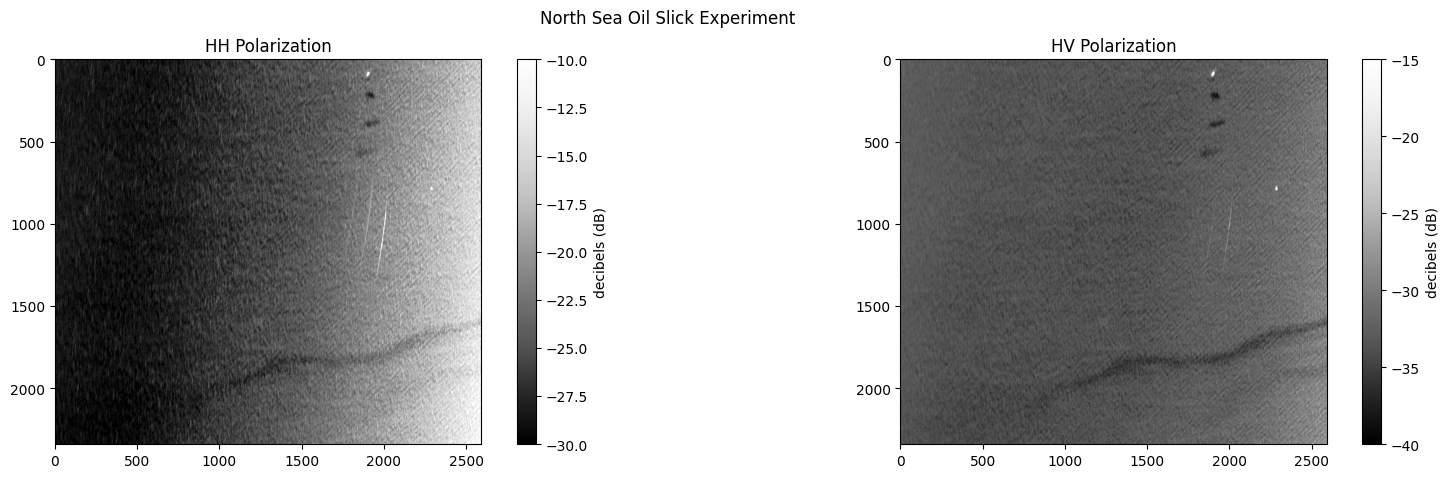

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Add general map title
fig.suptitle("North Sea Oil Slick Experiment")

HH_norway = ax[0].imshow(norway_000_HH_db, vmin=-30, vmax=-10, cmap="Greys_r")
ax[0].set_title('HH Polarization')
cbar = fig.colorbar(HH_norway, ax=ax[0])
cbar.set_label('decibels (dB)')

HV_norway = ax[1].imshow(norway_000_HV_db, vmin=-40, vmax=-15, cmap="Greys_r")
ax[1].set_title('HV Polarization')
cbar = fig.colorbar(HV_norway, ax=ax[1])
cbar.set_label('decibels (dB)')


HH and HV have differences in their dB ranges over the ocean and oil slick area.

Plot histograms of the HH and HV acquistions above.

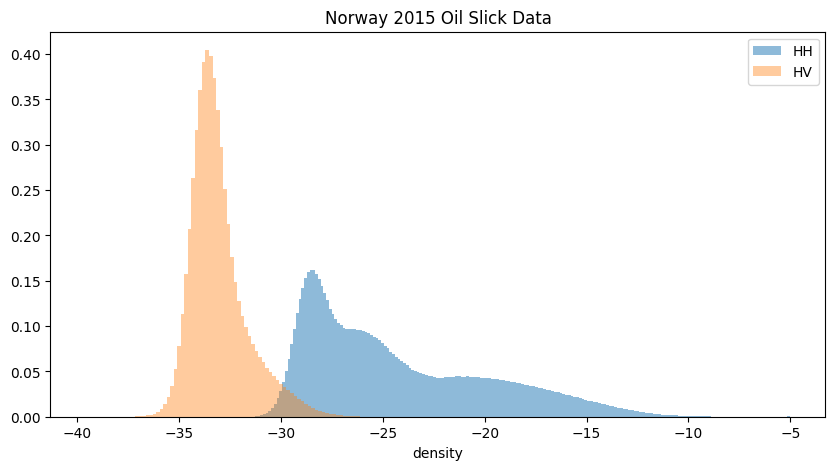

In [ ]:
n = 200
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(np.clip(norway_000_HH_db.ravel(),-40,-5), density=True, bins=n, alpha=0.5, label='HH')
ax.hist(np.clip(norway_000_HV_db.ravel(),-40,-5), density=True, bins=n, alpha=0.4, label='HV')
ax.set_title('Norway 2015 Oil Slick Data')
ax.legend(prop={'size': 10})
ax.set_xlabel('decibel (dB)')
ax.set_xlabel('density')

plt.show()

<a name="s4"></a>

# 3. North Sea Oil Slick: Oil slick movement over time

UAVSAR collected multiple data over the oil slick in Norway on June 10, 2015 to capture the movement of the oil on the surface of water throughout the day. In the three plots below, notice how the oil moves and disperses over time.

Data Take 1 was acquired at 10-Jun-2015 05:32:57 UTC

Data Take 8 was acquired at 10-Jun-2015 07:17:47 UTC

Data Take 14 was acquired at 10-Jun-2015 08:37:54 UTC

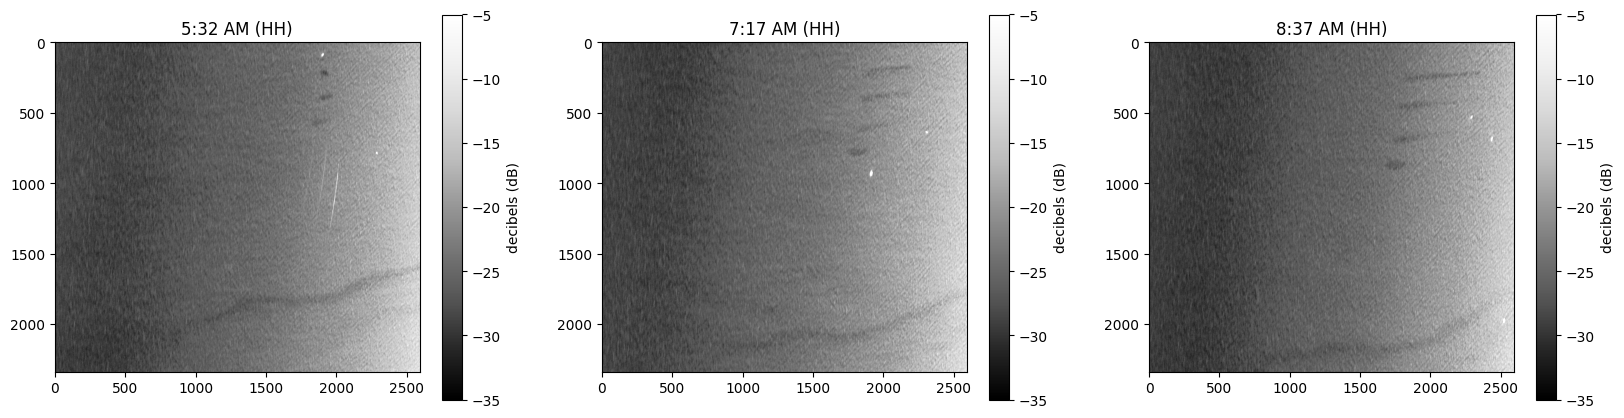

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ratio_1 = ax[0].imshow(norway_000_HH_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[0].set_title('5:32 AM (HH)')
cbar = fig.colorbar(ratio_1, ax=ax[0])
cbar.set_label('decibels (dB)')

ratio_8 = ax[1].imshow(norway_008_HH_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[1].set_title('7:17 AM (HH)')
cbar = fig.colorbar(ratio_8, ax=ax[1])
cbar.set_label('decibels (dB)')

ratio_14 = ax[2].imshow(norway_014_HH_db, vmin=-35, vmax=-5, cmap="Greys_r")
ax[2].set_title('8:37 AM (HH)')
cbar = fig.colorbar(ratio_14, ax=ax[2])
cbar.set_label('decibels (dB)')

## Data Download

Oil Spill line data pages:
1. Norway Data Take 000: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15092_000_150610_L090_CX_02#data

2. Norway Data Take 008: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15091_008_150610_L090_XX_02#data

3. Norway Data Take 014: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=norway_00709_15091_014_150610_L090_CX_01#data

4. Gulf Coast: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=gulfco_14010_10054_100_100623_L090_CX_05#data

NISAR Simulated:
1. https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=gulfco_32010_10054_101_100623_L090_CX_05#data (Modes 129A and 138A, dithered with gaps)

## Other Resources

NISAR Applications Oil Spill White Paper: [link](https://nisar.jpl.nasa.gov/rails/active_storage/disk/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaDdDRG9JYTJWNVNTSXBOekprTjJSaE1qQXROemxoWWkwME5EWmpMV0U0WWpjdE9HUXhZbVE0WWpaa00yRXpCam9HUlZRNkVHUnBjM0J2YzJsMGFXOXVTU0p4WVhSMFlXTm9iV1Z1ZERzZ1ptbHNaVzVoYldVOUlrNUpVMEZTWDBGd2NHeHBZMkYwYVc5dWMxOVBhV3hUY0dsc2JITXhMbkJrWmlJN0lHWnBiR1Z1WVcxbEtqMVZWRVl0T0NjblRrbFRRVkpmUVhCd2JHbGpZWFJwYjI1elgwOXBiRk53YVd4c2N6RXVjR1JtQmpzR1ZEb1JZMjl1ZEdWdWRGOTBlWEJsU1NJVVlYQndiR2xqWVhScGIyNHZjR1JtQmpzR1ZBPT0iLCJleHAiOiIyMDIzLTEyLTE5VDE4OjEyOjE0LjYyNFoiLCJwdXIiOiJibG9iX2tleSJ9fQ==--87666a1ff92999ea590605472317fe60faa4abef/NISAR_Applications_OilSpills1.pdf?content_type=application%2Fpdf&disposition=attachment%3B+filename%3D%22NISAR_Applications_OilSpills1.pdf%22%3B+filename%2A%3DUTF-8%27%27NISAR_Applications_OilSpills1.pdf)

UAVSAR data download page: https://uavsar.jpl.nasa.gov/cgi-bin/data.pl

NISAR Sampled Products: https://nisar.jpl.nasa.gov/data/sample-data/

NISAR Simulated Product Documentation: https://uavsar.jpl.nasa.gov/science/documents/nisar-sample-products.html

## References

1. Minchew, B., Jones, C.E. Holt, B. (2012). Polarimetric Analysis of Backscatter From the Deepwater Horizon Oil Spill Using L-Band Synthetic Aperture Radar. IEEE Transactions on Geoscience and Remote Sensing 50, 38123830. DOI: 10.1109/TGRS.2012.2185804;


2. Studies of the Deepwater Horizon Oil Spill With the UAVSAR Radar: http://www.mit.edu/~minchew/pubs/pdfs/Jones_DWHwithUAVSAR_AGUmonograph.pdf


3. Chaudhary, V. Kumar, S. (2020). Marine oil slicks detection using spaceborne and airborne SAR data. Advances in Space Research. DOI: 10.1016/j.asr.2020.05.003

4. Collins, M.J., Denbina, M., Minchew, B., Jones, C.E. Holt, B. (2015). On the Use of Simulated Airborne Compact Polarimetric SAR for Characterizing Oil-Water Mixing of the Deepwater Horizon Oil Spill. IEEE J. Sel. Top. Appl. Earth Observations Remote Sensing 8, 1062-1077. DOI: 10.1109/JSTARS.2015.2401041

5. Genovez, P., Jones, C., Santa-Anna, S. Freitas, C. (2019). Oil Slick Characterization Using a Statistical Region-Based Classifier Applied to UAVSAR Data. Journal of Marine Science and Engineering 7, 36. DOI: 10.3390/jmse7020036

6. Jones, C.E., Minchew, B., Holt, B. Hensley, S. (2011). Studies of the Deepwater Horizon Oil Spill With the UAVSAR Radar. Geophysical Monograph Series 3350. DOI: 10.1029/2011GM001113

7. Latini, D., Del Frate, F. Jones, C.E. (2016). Multi-frequency and polarimetric quantitative analysis of the Gulf of Mexico oil spill event comparing different SAR systems. Remote Sensing of Environment 183, 2642. DOI: 10.1016/j.rse.2016.05.014

8. Li, H., Perrie, W. Wu, J. (2019). Retrieval of Oil-Water Mixture Ratio at Ocean Surface Using Compact Polarimetry Synthetic Aperture Radar. Remote Sensing 11, 816. DOI: 10.3390/rs11070816

9. Marinoni, A., Espeseth, M.M., Gamba, P., Brekke, C. Eltoft, T. (2019). Assessment of Polarimetric Variability by Distance Geometry for Enhanced Classification of Oil Slicks Using SAR. Geoscience and Remote Sensing (IGARSS), IEEE International Symposium, Yokohama, Japan DOI: 10.1109/IGARSS.2019.8899247


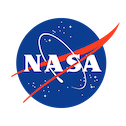

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2023. California Institute of Technology. Government sponsorship acknowledged.